In [23]:
import random
import math
import numpy as np
import pandas as pd
from scipy import linalg as la
from matplotlib import pyplot as plt

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Covariance matrix: 
 [[ 1.03233581  0.994671    3.05934262]
 [ 0.994671   10.02582378 12.01516579]
 [ 3.05934262 12.01516579 18.13385102]] 

Eigenvalues: 
 [2.71211597e+01+0.j 8.76457746e-16+0.j 2.07085093e+00+0.j]
Eigenvalues (real): 
 [2.71211597e+01 8.76457746e-16 2.07085093e+00]
V: 
 [[-0.11685294 -0.81649658  0.56540138]
 [-0.57561951 -0.40824829 -0.70851642]
 [-0.80932538  0.40824829  0.42228635]] 

Single values: 
 [2.71211597e+01 2.07085093e+00 6.38029431e-16]
U: 
 [[-0.11685294  0.56540138 -0.81649658]
 [-0.57561951 -0.70851642 -0.40824829]
 [-0.80932538  0.42228635  0.40824829]] 

Eigenvalues from singles values: 
 [ 2.71211597e+01  2.07085093e+00 -5.22631408e-16] 

Sorted eigenvalues: 
 [2.71211597e+01 2.07085093e+00 8.76457746e-16]
Sorted eigenvectors: 
 [[-0.11685294  0.56540138 -0.81649658]
 [-0.57561951 -0.70851642 -0.40824829]
 [-0.80932538  0.42228635  0.40824829]] 

Variability associated to each eigenvalue: 
 [9.29061038e-01 7.09389620e-02 3.00238910e-17]
Cumulative 

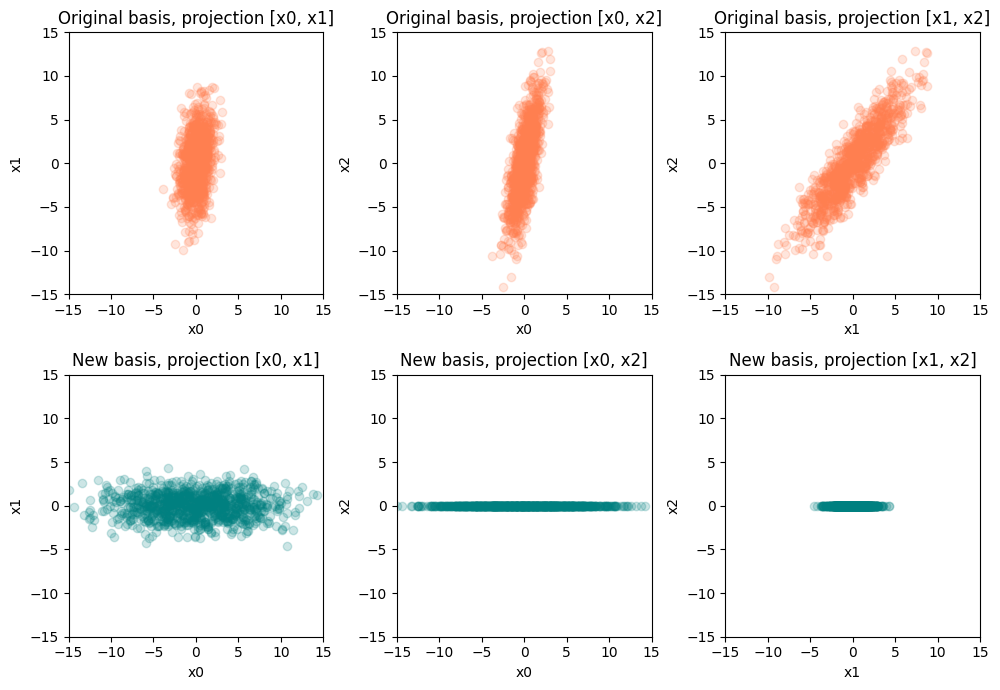

In [14]:
N = 1000

#Generate a dataset simulating 3 feature
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2*x1 + x2

X = np.array([x1, x2, x3])
C = np.cov(X)
print('Covariance matrix: \n', C, '\n')

#Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
l, V = la.eig(C)
print('Eigenvalues: \n', l)
# take only the real component, if possible
l = np.real_if_close(l)
print('Eigenvalues (real): \n', l)
print('V: \n', V, '\n')

#Find the eigenvectors and eigenvalues using the SVD
U, s, Vt = la.svd(C)
print('Single values: \n', s)
print('U: \n', U, '\n')

#Two values and vector correspond, the third is different in sign
l_svd = np.matmul(s, np.matmul(Vt, U)) #convert the single values in eigenvalues
print('Eigenvalues from singles values: \n', l_svd, '\n')
#l_svd2 = s**2/(N-1)
#print(l_svd2)

#Sort the eigenvalues in descending order
#ls = np.sort(abs(l))
#ls[::-1].sort()
#print(ls)
#Sort at the same way the eigenvectors
 

# Sort eigen values and corresponding eigen vectors in descending order
ind = np.arange(0,len(l), 1)
ind = ([x for _,x in sorted(zip(l, ind))])[::-1]
ls = l[ind]
Vs = V[:,ind]

print('Sorted eigenvalues: \n', ls)
print('Sorted eigenvectors: \n', Vs, '\n')

#Check the variability 
sum_eigval = np.sum(ls)
exp_var = ls/ sum_eigval
print('Variability associated to each eigenvalue: \n', exp_var)
cum_var = np.cumsum(exp_var)
print('Cumulative variability associated to eigenvalues: \n',cum_var, '\n')

#k=2, the first two variables give you the total vaiability
ls = np.sort(abs(l))
ls[::-1].sort()
ksum = ls[0]+ls[1]
var1 = ksum / np.sum(ls)

print('We retain', var1, '%', 'of the total variability \n')

#Redefine the data according to the new basis from the PCA
Vsnew = Vs
Vsnew[:,2] = 0
Xnew = np.dot(X.T, Vsnew)

#X = np.dot(X.T, V)

#Plot the data, in both the original and the new basis
#The figure should have 2 rows and 3 columns

fig1, axs = plt.subplots(2, 3)
fig1.set_figheight(7)
fig1.set_figwidth(10)

axs[0,0].scatter(x1, x2, color='coral', alpha=0.2)
axs[0,0].set_title('Original basis, projection [x0, x1]')
axs[0,0].set_xlim(-15,15)
axs[0,0].set_ylim(-15,15)
axs[0,0].set_xlabel('x0')
axs[0,0].set_ylabel('x1')


axs[0,1].scatter(x1, x3, color='coral', alpha=0.2)
axs[0,1].set_title('Original basis, projection [x0, x2]')
axs[0,1].set_xlim(-15,15)
axs[0,1].set_ylim(-15,15)
axs[0,1].set_xlabel('x0')
axs[0,1].set_ylabel('x2')

axs[0,2].scatter(x2, x3, color='coral', alpha=0.2)
axs[0,2].set_title('Original basis, projection [x1, x2]')
axs[0,2].set_xlim(-15,15)
axs[0,2].set_ylim(-15,15)
axs[0,2].set_xlabel('x1')
axs[0,2].set_ylabel('x2')

axs[1,0].scatter(Xnew[:,0], Xnew[:,1], color='teal', alpha=0.2)
axs[1,0].set_title('New basis, projection [x0, x1]')
axs[1,0].set_xlim(-15,15)
axs[1,0].set_ylim(-15,15)
axs[1,0].set_xlabel('x0')
axs[1,0].set_ylabel('x1')

axs[1,1].scatter(Xnew[:,0], Xnew[:,2], color='teal', alpha=0.2)
axs[1,1].set_title('New basis, projection [x0, x2]')
axs[1,1].set_xlim(-15,15)
axs[1,1].set_ylim(-15,15)
axs[1,1].set_xlabel('x0')
axs[1,1].set_ylabel('x2')

axs[1,2].scatter(Xnew[:,1], Xnew[:,2], color='teal', alpha=0.2)
axs[1,2].set_title('New basis, projection [x1, x2]')
axs[1,2].set_xlim(-15,15)
axs[1,2].set_ylim(-15,15)
axs[1,2].set_xlabel('x1')
axs[1,2].set_ylabel('x2')

fig1.tight_layout()


# 2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

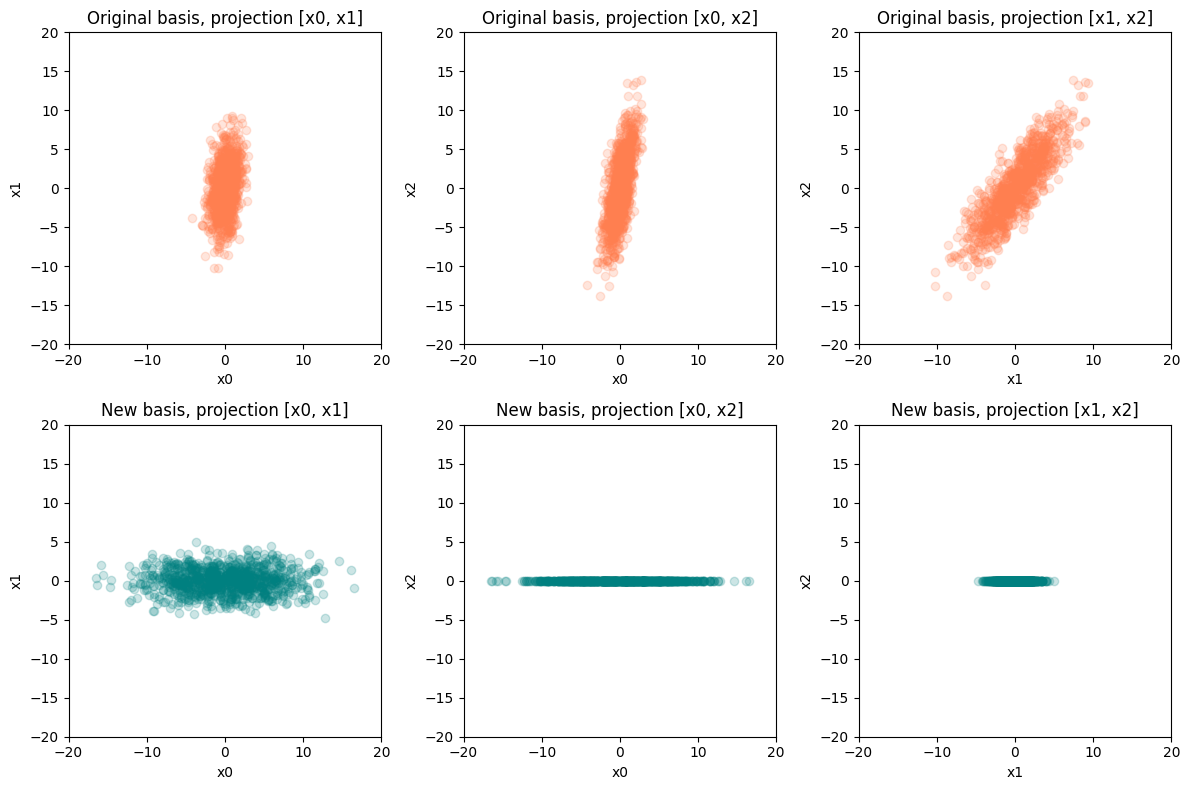

In [21]:
#Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise
N = (1000, 10)

mu1, sigma1 = 0, 1/20
w1 = np.random.normal(mu1, sigma1, N)
w1 = w1.sum(axis=1)    
x1_n = x1 + w1   

mu2, sigma2 = 0, 3/20
w2 = np.random.normal(mu2, sigma2, N)
w2 = w2.sum(axis=1)    
x2_n = x2 + w2   

mu3, sigma3 = 0, 7/20
w3 = np.random.normal(mu3, sigma3, N)
w3 = w3.sum(axis=1)    
x3_n = x3 + w3   

Xn = np.array([x1_n, x2_n, x3_n])
Cn = np.cov(Xn)

#Repeat the PCA procedure
ln, Vn = la.eig(Cn)
# take only the real component, if possible
ln = np.real_if_close(ln)

ind = np.arange(0,len(ln), 1)
ind = ([x_n for _,x_n in sorted(zip(ln, ind))])[::-1]
lns = ln[ind]
Vns = Vn[:,ind]

#Redefine the data according to the new basis from the PCA
Vnsnew = Vns
Vnsnew[:,2] = 0
Xnnew = np.dot(Xn.T, Vnsnew)

#X = np.dot(X.T, V)

#Plot the data, in both the original and the new basis
#The figure should have 2 rows and 3 columns

fig2, axs = plt.subplots(2, 3)
fig2.set_figheight(8)
fig2.set_figwidth(12)


axs[0,0].scatter(x1_n, x2_n, color='coral', alpha=0.2)
axs[0,0].set_title('Original basis, projection [x0, x1]')
axs[0,0].set_xlim(-20,20)
axs[0,0].set_ylim(-20,20)
axs[0,0].set_xlabel('x0')
axs[0,0].set_ylabel('x1')

axs[0,1].scatter(x1_n, x3_n, color='coral', alpha=0.2)
axs[0,1].set_title('Original basis, projection [x0, x2]')
axs[0,1].set_xlim(-20,20)
axs[0,1].set_ylim(-20,20)
axs[0,1].set_xlabel('x0')
axs[0,1].set_ylabel('x2')

axs[0,2].scatter(x2_n, x3_n, color='coral', alpha=0.2)
axs[0,2].set_title('Original basis, projection [x1, x2]')
axs[0,2].set_xlim(-20,20)
axs[0,2].set_ylim(-20,20)
axs[0,2].set_xlabel('x1')
axs[0,2].set_ylabel('x2')

axs[1,0].scatter(Xnnew[:,0], Xnnew[:,1], color='teal', alpha=0.2)
axs[1,0].set_title('New basis, projection [x0, x1]')
axs[1,0].set_xlim(-20,20)
axs[1,0].set_ylim(-20,20)
axs[1,0].set_xlabel('x0')
axs[1,0].set_ylabel('x1')

axs[1,1].scatter(Xnnew[:,0], Xnnew[:,2], color='teal', alpha=0.2)
axs[1,1].set_title('New basis, projection [x0, x2]')
axs[1,1].set_xlim(-20,20)
axs[1,1].set_ylim(-20,20)
axs[1,1].set_xlabel('x0')
axs[1,1].set_ylabel('x2')

axs[1,2].scatter(Xnnew[:,1], Xnnew[:,2], color='teal', alpha=0.2)
axs[1,2].set_title('New basis, projection [x1, x2]')
axs[1,2].set_xlim(-20,20)
axs[1,2].set_ylim(-20,20)
axs[1,2].set_xlabel('x1')
axs[1,2].set_ylabel('x2')

fig2.tight_layout()

#compare the results with what you have obtained before
#From the plots you can observe that they are very similar, almost equal


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [4]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [36]:
magic = pd.read_csv("./magic04.data", header=None)
magic = magic.drop(columns=[10])
display(magic)

# Perform SVD decomposition on the dataset
U, S, Vt = np.linalg.svd(magic)

l = S**2/(-1) 
V = U

print( '\n SVD:')
print('\nEigenvalues: \n', l)
print('\nEigenvectors: \n', V)
print('\n')

#Perform PCA
lsum = l.sum()
i = 0
for i in range(magic.shape[1]):
    var = (l[i]/lsum)*100
    print('By selecting the component %d, we retain %.2f%% of the total variability' % (i,var))

,0,1,2,3,4,5,6,7,8,9
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166



 SVD:

Eigenvalues: 
 [-9.07984944e+08 -7.98524370e+07 -3.96456019e+07 -2.54590815e+07
 -1.56229664e+07 -8.24791214e+06 -2.23211211e+06 -1.07288186e+04
 -6.62914518e+02 -8.03812118e+00]

Eigenvectors: 
 [[-3.03239936e-03 -3.58932705e-03  8.45817849e-04 ... -8.20996315e-03
  -1.28599398e-02 -1.97295965e-02]
 [-6.80776740e-03 -4.93168598e-03  8.93506042e-04 ...  1.12988341e-02
   1.79290324e-02 -1.18726695e-02]
 [-1.00144095e-02 -3.78153851e-03  2.13679760e-02 ... -3.87890932e-04
  -8.99605080e-03 -1.28865116e-02]
 ...
 [-9.10740061e-03 -1.62275473e-03 -3.51827734e-03 ...  9.99671590e-01
  -4.27057217e-04  1.39714689e-04]
 [-1.43559247e-02  4.78057046e-03  1.80811955e-02 ... -4.37283224e-04
   9.97991209e-01 -7.82847471e-05]
 [-1.06045893e-02  2.77433781e-02  1.12912403e-02 ...  1.37450466e-04
  -9.91712402e-05  9.98563967e-01]]


By selecting the component 0, we retain 84.15% of the total variability
By selecting the component 1, we retain 7.40% of the total variability
By selecting th